<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge
### Notebook #3 for Modelling Process [Group]

### Import Libraries Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Import Cleaned Datasets

In [2]:
#import datasets
df_train = pd.read_csv('../data/train-clean.csv')
df_test = pd.read_csv('../data/test-clean.csv')

### Data Dictionary

In [3]:
#To assist creating data dict
for header,item in df_train.items():
    if item.dtype == 'int64':
        print(f"|{header}|*integer*|train-clean| |")
    elif item.dtype == 'float64':
        print(f"|{header}|*float*|train-clean| |")
    else: 
        print(f"|{header}|*str*|train-clean| |")


|id|*integer*|train-clean| |
|tranc_yearmonth|*str*|train-clean| |
|town|*str*|train-clean| |
|flat_type|*str*|train-clean| |
|block|*str*|train-clean| |
|street_name|*str*|train-clean| |
|storey_range|*str*|train-clean| |
|floor_area_sqm|*float*|train-clean| |
|flat_model|*str*|train-clean| |
|lease_commence_date|*integer*|train-clean| |
|resale_price|*float*|train-clean| |
|tranc_year|*integer*|train-clean| |
|tranc_month|*integer*|train-clean| |
|mid_storey|*integer*|train-clean| |
|lower|*integer*|train-clean| |
|upper|*integer*|train-clean| |
|mid|*integer*|train-clean| |
|full_flat_type|*str*|train-clean| |
|address|*str*|train-clean| |
|floor_area_sqft|*float*|train-clean| |
|price_per_sqft|*float*|train-clean| |
|hdb_age|*integer*|train-clean| |
|max_floor_lvl|*integer*|train-clean| |
|year_completed|*integer*|train-clean| |
|residential|*integer*|train-clean| |
|commercial|*integer*|train-clean| |
|market_hawker|*integer*|train-clean| |
|multistorey_carpark|*integer*|train-cle

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|*integer*|train-clean|The property's sale price in Singapore dollars|
|tranc_yearmonth|*str*|train-clean|Year and month of the resale transaction, e.g. 2015-02|
|town|*str*|train-clean|HDB township where the flat is located, e.g. BUKIT MERAH|
|flat_type|*str*|train-clean|Type of the resale flat unit, e.g. 3 ROOM|
|block|*str*|train-clean|Block number of the resale flat, e.g. 454|
|street_name|*str*|train-clean|Street name where the resale flat resides, e.g. TAMPINES ST 42|
|storey_range|*str*|train-clean|Floor level (range) of the resale flat unit, e.g. 07 TO 09|
|floor_area_sqm|*float*|train-clean|Floor area of the resale flat unit in square metres|
|flat_model|*str*|train-clean|HDB model of the resale flat, e.g. Multi Generation|
|lease_commence_date|*integer*|train-clean|Commencement year of the flat unit's 99-year lease|
|resale_price|*float*|train-clean|The property's sale price in Singapore dollars|
|tranc_year|*integer*|train-clean|Year of resale transaction|
|tranc_month|*integer*|train-clean|Month of resale transaction|
|mid_storey|*integer*|train-clean|Median value of storey_range|
|lower|*integer*|train-clean|Lower value of storey_range|
|upper|*integer*|train-clean|Upper value of storey_range|
|mid|*integer*|train-clean|Middle value of storey_range|
|full_flat_type|*str*|train-clean|Combination of flat_type and flat_model|
|address|*str*|train-clean|Combination of block and street_name|
|floor_area_sqft|*float*|train-clean|Floor area of the resale flat unit in square feet|
|price_per_sqft|*float*|train-clean|Price per square feet|
|hdb_age|*integer*|train-clean|Number of years from lease_commence_date to present year|
|max_floor_lvl|*integer*|train-clean|Highest floor of the resale flat|
|year_completed|*integer*|train-clean|Year which construction was completed for resale flat|
|residential|*integer*|train-clean|Boolean value if resale flat has residential units in the same block|
|commercial|*integer*|train-clean|Boolean value if resale flat has commercial units in the same block|
|market_hawker|*integer*|train-clean|Boolean value if resale flat has a market or hawker centre in the same block|
|multistorey_carpark|*integer*|train-clean|Boolean value if resale flat has a multistorey carpark in the same block|
|precinct_pavilion|*integer*|train-clean|Boolean value if resale flat has a pavilion in the same block|
|total_dwelling_units|*integer*|train-clean|Total number of residential dwelling units in the resale flat|
|1room_sold|*integer*|train-clean|Number of 1-room residential units in the resale flat|
|2room_sold|*integer*|train-clean|Number of 2-room residential units in the resale flat|
|3room_sold|*integer*|train-clean|Number of 3-room residential units in the resale flat|
|4room_sold|*integer*|train-clean|Number of 4-room residential units in the resale flat|
|5room_sold|*integer*|train-clean|Number of 5-room residential units in the resale flat|
|exec_sold|*integer*|train-clean|Number of executive type residential units in the resale flat block|
|multigen_sold|*integer*|train-clean|Number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold|*integer*|train-clean|Number of studio apartment type residential units in the resale flat block|
|1room_rental|*integer*|train-clean|Number of 1-room rental residential units in the resale flat block|
|2room_rental|*integer*|train-clean|Number of 2-room rental residential units in the resale flat block|
|3room_rental|*integer*|train-clean|Number of 3-room rental residential units in the resale flat block|
|other_room_rental|*integer*|train-clean|Number of "other" type rental residential units in the resale flat block|
|postal|*str*|train-clean|Postal code of the resale flat block|
|latitude|*float*|train-clean|Latitude based on postal code|
|longitude|*float*|train-clean|Longitude based on postal code|
|planning_area|*str*|train-clean|Government planning area that the flat is located|
|mall_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest mall|
|mall_within_500m|*float*|train-clean|Number of malls within 500 metres|
|mall_within_1km|*float*|train-clean|Number of malls within 1 kilometre|
|mall_within_2km|*float*|train-clean|Number of malls within 2 kilometres|
|hawker_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest hawker centre|
|hawker_within_500m|*float*|train-clean|Number of hawker centres within 500 metres|
|hawker_within_1km|*float*|train-clean|Number of hawker centres within 1 kilometre|
|hawker_within_2km|*float*|train-clean|Number of hawker centres within 2 kilometres|
|hawker_food_stalls|*integer*|train-clean|Number of hawker food stalls in the nearest hawker centre|
|hawker_market_stalls|*integer*|train-clean|Number of hawker and market stalls in the nearest hawker centre|
|mrt_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest MRT station|
|mrt_name|*str*|train-clean|Name of the nearest MRT station|
|bus_interchange|*integer*|train-clean|Boolean value if the nearest MRT station is also a bus interchange|
|mrt_interchange|*integer*|train-clean|Boolean value if the nearest MRT station is a train interchange station|
|mrt_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest MRT station|
|mrt_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest MRT station|
|bus_stop_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest bus stop|
|bus_stop_name|*str*|train-clean|Name of the nearest bus stop|
|bus_stop_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest bus stop|
|bus_stop_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest bus stop|
|pri_sch_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest primary school|
|pri_sch_name|*integer*|train-clean|Name of the nearest primary school|
|vacancy|*integer*|train-clean|Number of vacancies in the nearest primary school|
|pri_sch_affiliation|*integer*|train-clean|Boolean value if the nearest primary school has a secondary school affiliation|
|pri_sch_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest primary school|
|pri_sch_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest primary school|
|sec_sch_nearest_dist|*float*|train-clean|Distance (in metres) to the nearest secondary school|
|sec_sch_name|*integer*|train-clean|Name of the nearest secondary school|
|cutoff_point|*integer*|train-clean|PSLE cutoff point of the nearest secondary school|
|affiliation|*integer*|train-clean|Boolean value if the nearest secondary school has an primary school affiliation|
|sec_sch_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest secondary school|
|sec_sch_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest secondary school|
|region|*integer*|train-clean|Distribution of Central Region and Outside of Central Region|

### Exploratory Data Analysis

**Summary Statistics**

In [4]:
df_train.describe()

id  floor_area_sqm  lease_commence_date  resale_price  \
count  150634.000000    150634.00000        150634.000000  1.506340e+05   
mean    93047.887496        97.19763          1992.448464  4.491615e+05   
std     53679.906247        24.40304            12.138829  1.433076e+05   
min         1.000000        31.00000          1966.000000  1.500000e+05   
25%     46469.250000        75.00000          1984.000000  3.470000e+05   
50%     93077.500000        95.00000          1992.000000  4.200000e+05   
75%    139574.750000       112.00000          2001.000000  5.200000e+05   
max    185966.000000       280.00000          2019.000000  1.258000e+06   

          tranc_year    tranc_month     mid_storey          lower  \
count  150634.000000  150634.000000  150634.000000  150634.000000   
mean     2016.489551       6.580500       8.284823       7.248370   
std         2.752396       3.345468       5.508074       5.515155   
min      2012.000000       1.000000       2.000000       1.000000   
25%      2014.000000       4.000000       5.000000       4.000000   
50%      2017.000000       7.000000       8.000000       7.000000   
75%      2019.000000       9.000000      11.000000      10.000000   
max      2021.000000      12.000000      50.000000      49.000000   

               upper            mid  ...  pri_sch_nearest_distance  \
count  150634.000000  150634.000000  ...             150634.000000   
mean        9.321275       8.284823  ...                395.172974   
std         5.507364       5.508074  ...                234.760931   
min         3.000000       2.000000  ...                 45.668324   
25%         6.000000       5.000000  ...                227.083163   
50%         9.000000       8.000000  ...                348.876691   
75%        12.000000      11.000000  ...                502.179385   
max        51.000000      50.000000  ...               3305.841039   

             vacancy  pri_sch_affiliation  pri_sch_latitude  \
count  150634.000000        150634.000000     150634.000000   
mean       55.368190             0.113195          1.366268   
std        17.903918             0.316832          0.042669   
min        20.000000             0.000000          1.274962   
25%        44.000000             0.000000          1.337289   
50%        54.000000             0.000000          1.364639   
75%        67.000000             0.000000          1.393910   
max       110.000000             1.000000          1.456667   

       pri_sch_longitude  sec_sch_nearest_dist   cutoff_point    affiliation  \
count      150634.000000         150634.000000  150634.000000  150634.000000   
mean          103.839106            508.533220     210.146428       0.031879   
std             0.072637            309.066265      20.010489       0.175677   
min           103.687724             38.913475     188.000000       0.000000   
25%           103.773754            290.285883     188.000000       0.000000   
50%           103.844210            447.377670     208.000000       0.000000   
75%           103.898773            644.284099     224.000000       0.000000   
max           103.962919           3638.977233     260.000000       1.000000   

       sec_sch_latitude  sec_sch_longitude  
count     150634.000000      150634.000000  
mean           1.365986         103.839340  
std            0.042599           0.072630  
min            1.276029         103.687207  
25%            1.337545         103.776008  
50%            1.366132         103.842719  
75%            1.391781         103.899872  
max            1.453280         103.961105  

[8 rows x 63 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

**Data Preprocessing**

*`pri_sch_name` and `sec_sch_name`*

Convert pri_sch_name and sec_sch_name to numerical value by classifying them as:

* Top school = 1
* Other School = 0

Top school definition is based on the following source:

* [`2022 Primary School Ranking`](https://schoolbell.sg/primary-school-ranking/)
* [`2022 Secondary School Ranking`](https://schoolbell.sg/secondary-school-ranking/)

In [6]:
#create top school list for primary school and secondary school
top_pri_sch = ['Rosyth School','Nan Hua Primary School',"Saint Hilda's Primary School",
               'Catholic High School','Henry Park Primary School','Nanyang Primary School',
               'Tao Nan School',"Raffles Girls' School"]

top_sec_sch = ["Raffles Girls' School", 'Raffles Institution',"CHIJ Saint Nicholas Girls' School",
               'Anglo-Chinese School',"Methodist Girls' School",'Dunman High School','Catholic High School',
               "Cedar Girls' Secondary School",'Temasek Junior College','River Valley High School']

#convert school name to numerical value based on top school or not
#convert train datasets 
df_train['pri_sch_name'] = df_train['pri_sch_name'].apply(lambda x: 1 if x in top_pri_sch else 0)
df_train['sec_sch_name'] = df_train['sec_sch_name'].apply(lambda x: 1 if x in top_sec_sch else 0)
# #convert test datasets
df_test['pri_sch_name'] = df_test['pri_sch_name'].apply(lambda x: 1 if x in top_pri_sch else 0)
df_test['sec_sch_name'] = df_test['sec_sch_name'].apply(lambda x: 1 if x in top_sec_sch else 0)


`region`

Create new column to distibute `planning_area` as:

* Central Region(cr) = 1
* Outside Central Region(ocr) = 0

Source: [`Definition of CCR, RCR and OCR`](https://www.propertyguru.com.sg/property-guides/ccr-ocr-rcr-region-singapore-ura-map-21045). This article explains the distribution of each `planning_area` based on the region

Note: From the source there are distrubition of 3 areas which area CCR(Central), RCR (Rest of Central Region) and OCR. For this project, CCR and RCR are combined as one defined as `Central Region` 



In [7]:
#create list of central region 
cr = ['Bukit Timah','Downtown Core','Novena','Tanglin','Bishan',
      'Geylang','Kallang','Marine Parade','Outram','Queenstown',
      'Rochor','Toa Payoh', 'Bukit Merah']

#create list of outside central region
ocr = ['Ang Mo Kio', 'Bedok','Bukit Batok','Bukit Panjang', 'Changi', 'Choa Chu Kang',
       'Clementi','Hougang','Jurong East','Jurong West','Pasir Ris','Punggol','Sembawang',
       'Sengkang','Serangoon','Tampines','Western Water Catchment','Woodlands','Yishun']

#create empty list of region
region_train = []
for place in df_train['planning_area']:
    if place in cr:
        region_train.append(1)
    else:
        region_train.append(0)

#convert from list to dataframe
region_train = pd.DataFrame(region_train, columns = ['region'])

#combine to train datasets 
df_train = pd.concat([df_train,region_train], axis=1)

#create region dataset for test model
region_test = []
for place in df_test['planning_area']:
    if place in cr:
        region_test.append(1)
    else:
        region_test.append(0)

#convert from list to dataframe
region_test = pd.DataFrame(region_test, columns = ['region'])

#combine to test datasets 
df_test = pd.concat([df_test,region_test], axis=1)

`town`

Because there is a column named as `planning area`, and it can represent `town`, convert `town` from categorical to numerical value by:

* Mature Estate = 1
* Non-Mature Estate = 0 

Source: [`Non-Mature and Mature Estates`](https://www.propertyguru.com.sg/property-guides/non-mature-vs-mature-bto-55760). This article explains the distribution of `town` based on mature and non-mature estate


In [8]:
#create mature estate list 
mature_estate_list = ['ANG MO KIO','BEDOK','BISHAN','BUKIT MERAH',
                      'BUKIT TIMAH','CENTRAL AREA','CLEMENTI',
                      'GEYLANG','KALLANG/WHAMPOA','MARINE PARADE',
                      'PASIR RIS','QUEENSTOWN','SERANGOON',
                      'TAMPINES','TOA PAYOH']

#train model
df_train['town'] = df_train['town'].apply(lambda x: 1 if x in mature_estate_list else 0)

#test model
df_test['town'] = df_test['town'].apply(lambda x: 1 if x in mature_estate_list else 0)


### Data Visualization

**Drop object datatype to get correlation between numerical values**

In [9]:
#identify object dtype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 79 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  int64  
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [10]:
#drop all object dtype
df_train_num = df_train.drop(columns = ['block','street_name','storey_range','full_flat_type',
                                        'address','postal','mrt_name','bus_stop_name','tranc_yearmonth',
                                        'flat_type', 'flat_model','planning_area'])

**Create heatmap**

<Axes: >

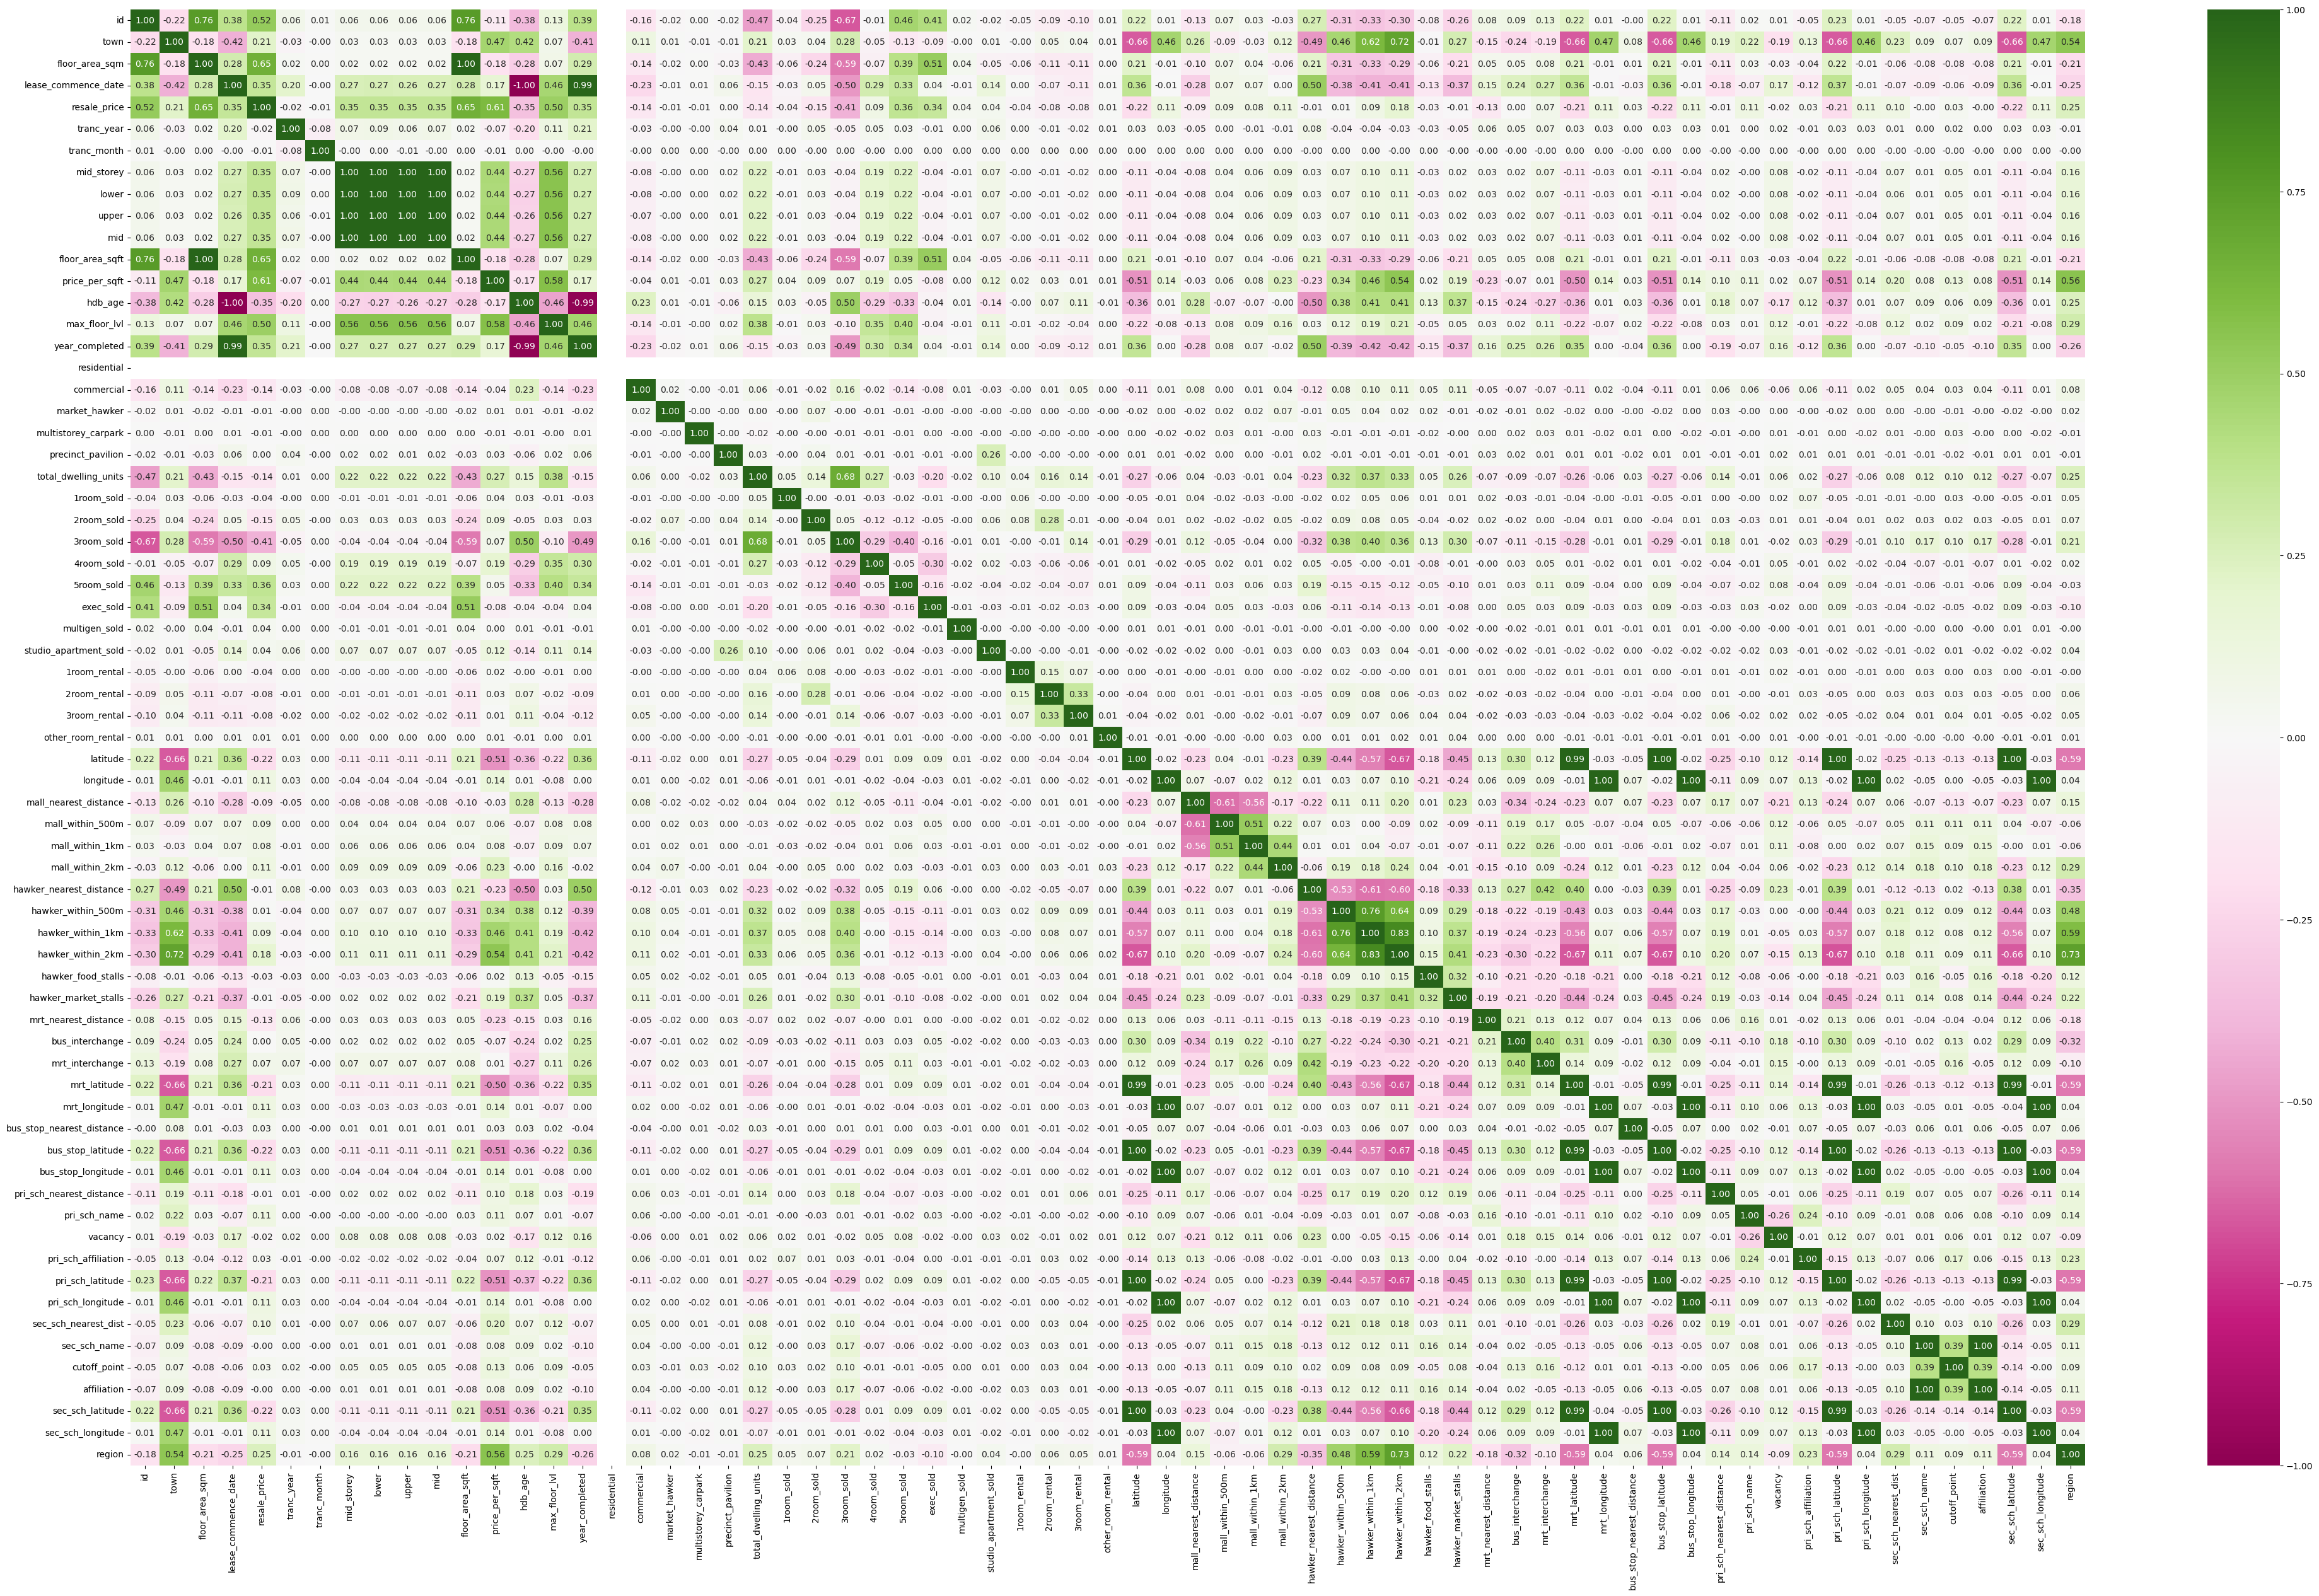

In [11]:
#create heatmap
plt.figure(figsize=(50,30))
sns.heatmap(df_train_num.corr(), cmap='PiYG', annot = True, fmt='.2f')

**Create pairplots with `resale_price` as dependent variable**

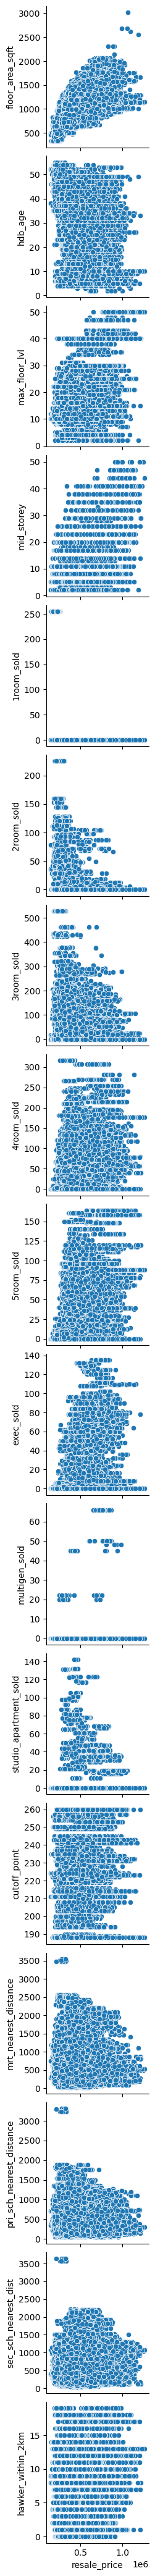

In [12]:
#features for pairplot 
y_vars = ['floor_area_sqft','hdb_age','max_floor_lvl',
          'mid_storey','1room_sold','2room_sold','3room_sold','4room_sold',
          '5room_sold','exec_sold','multigen_sold','studio_apartment_sold',
          'cutoff_point','mrt_nearest_distance','pri_sch_nearest_distance',
          'sec_sch_nearest_dist','hawker_within_2km']

x_vars = ['resale_price']

#create pairplot
sns.pairplot(df_train, x_vars=x_vars, y_vars=y_vars);

**Analyse the trends in resale price vs. number of transactions over the years**

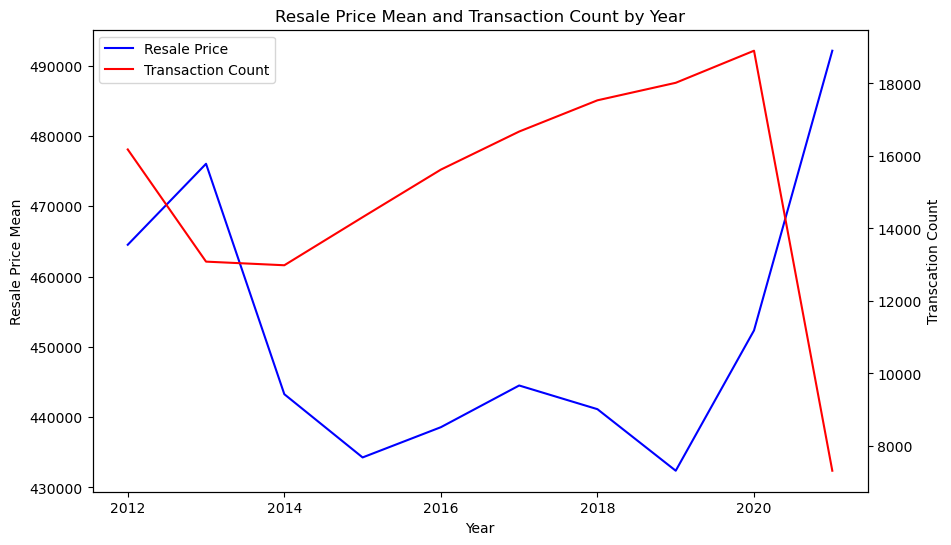

In [13]:
fig , ax1 = plt.subplots(figsize=(10,6));

ax2 = ax1.twinx()

line1 = ax1.plot(df_train.groupby('tranc_year')['resale_price'].mean(), color = 'b', label = 'Resale Price')

line2 = ax2.plot(df_train.groupby('tranc_year')['resale_price'].count(), color = 'r', label = 'Transaction Count')

#set axis label
ax1.set_ylabel('Resale Price Mean');
ax1.set_xlabel('Year')
ax2.set_ylabel('Transcation Count');

line = line1+line2
labs = [l.get_label() for l in line]
ax1.legend(line, labs, loc=0)

plt.title("Resale Price Mean and Transaction Count by Year");




*Interpretation: The graph shows that as mean resale prices increase, there is a decreaing trend on the number of transactions* 

**Analyse mean resale price based on location**

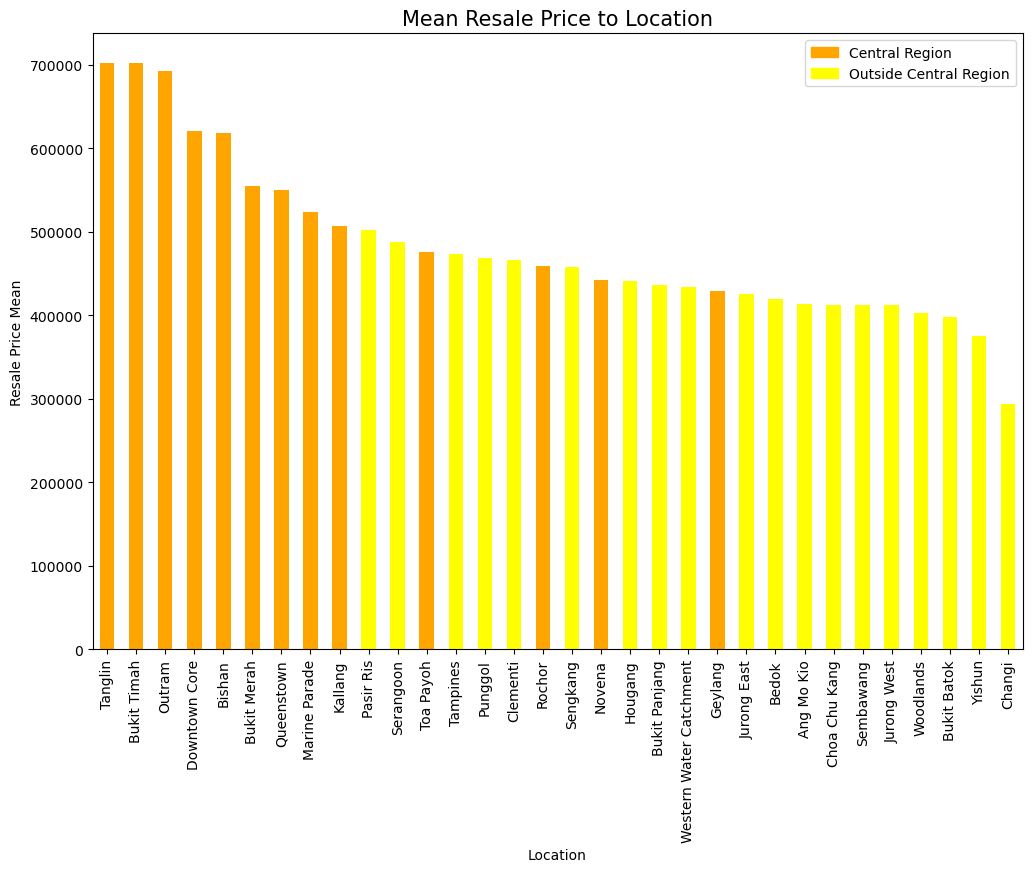

In [14]:
area_resale_price_sort = df_train.groupby('planning_area')['resale_price'].mean().sort_values(ascending=False).index

colors = ["orange" if i in cr else "yellow" for i in area_resale_price_sort]
resale_price_loc_plot = df_train.groupby('planning_area')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar', color = colors, figsize = (12,8));
plt.ylabel('Resale Price Mean')
plt.xlabel('Location');
plt.title("Mean Resale Price to Location" , fontsize = 15);

cr_patch = mpatches.Patch(color='orange', label = 'Central Region')
ocr_patch = mpatches.Patch(color='yellow', label = 'Outside Central Region')
plt.legend(handles = [cr_patch,ocr_patch]);

*Interpretation: The graph shows that highest mean resale price are mostly from central region* 

**Analyse transaction count based on location**

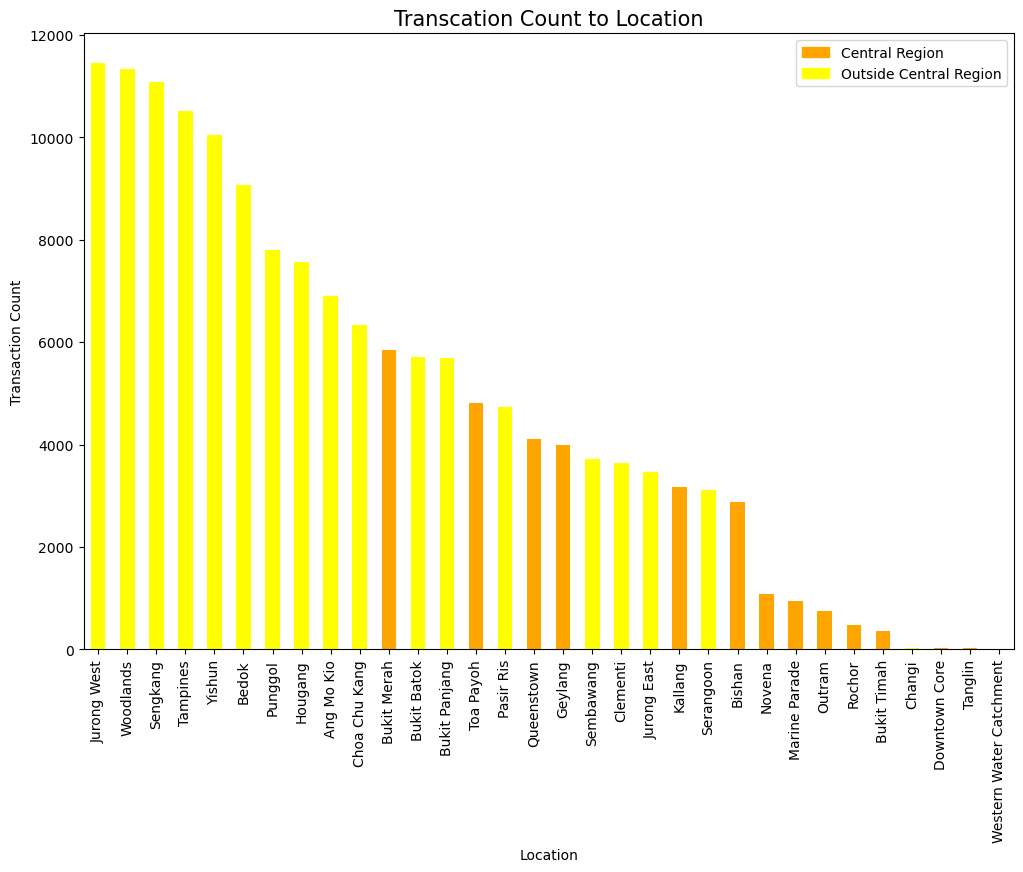

In [15]:
area_resale_price_sort = df_train.groupby('planning_area')['resale_price'].count().sort_values(ascending=False).index

colors = ["orange" if i in cr else "yellow" for i in area_resale_price_sort]
resale_price_loc_plot = df_train.groupby('planning_area')['resale_price'].count().sort_values(ascending=False).plot(kind='bar', color = colors, figsize = (12,8));
plt.ylabel('Transaction Count')
plt.xlabel('Location');
plt.title("Transcation Count to Location", fontsize = 15);

cr_patch = mpatches.Patch(color='orange', label = 'Central Region')
ocr_patch = mpatches.Patch(color='yellow', label = 'Outside Central Region')
plt.legend(handles = [cr_patch,ocr_patch]);

*Interpretation: This graph shows the opposite from the resale mean price, outside central region has higher transaction count* 

**Analyse correlation of top 3 highest features (`floor_area_sqft`, `max_floor_lvl`, `hdb_age`) with `resale_price`**

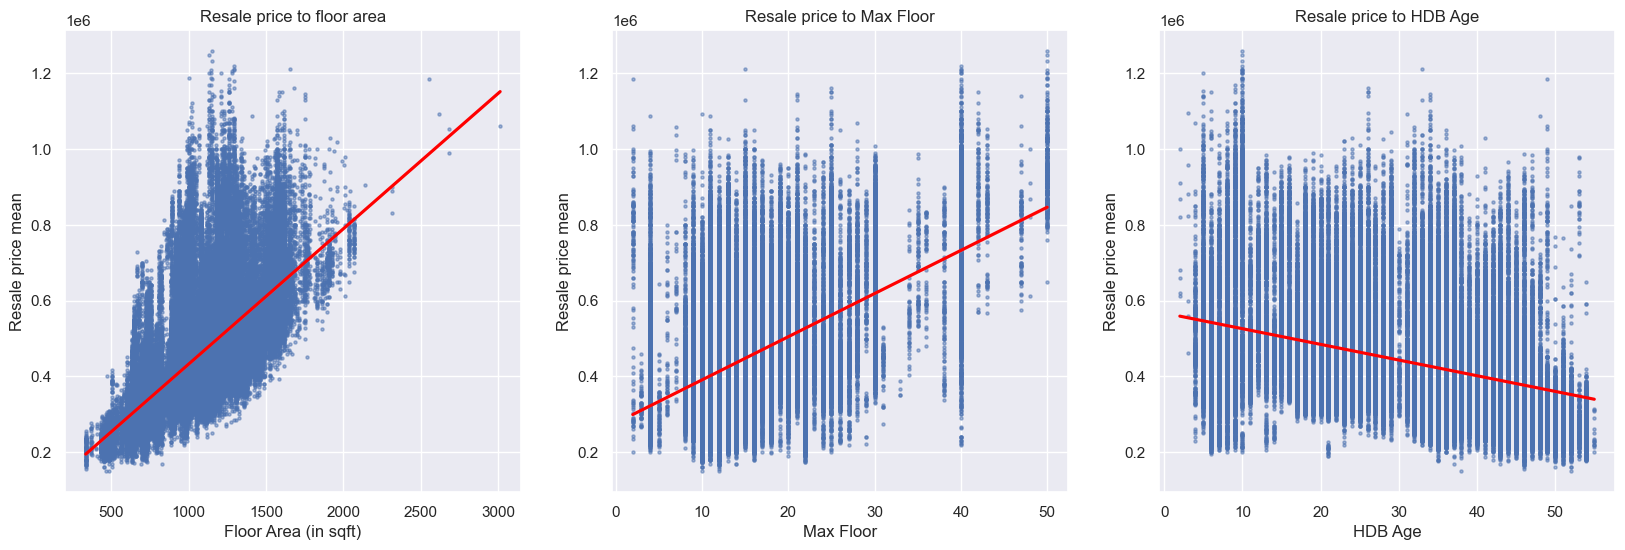

<Figure size 1000x1500 with 0 Axes>

In [64]:
fig, ax = plt.subplots(1,3)
plt.figure(figsize=(10,15))

#create scatter plot between floor_area_sqft and resale_price
sns.regplot(x = 'floor_area_sqft', y = 'resale_price', data = df_train,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[0]);
ax[0].set_xlabel('Floor Area (in sqft)')
ax[0].set_title("Resale price to floor area")
ax[0].set_ylabel('Resale price mean')

#create scatter plot between max_floor_lvl and resale_price
sns.regplot(x = 'max_floor_lvl', y = 'resale_price', data = df_train,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[1]);
ax[1].set_xlabel('Max Floor')
ax[1].set_title("Resale price to Max Floor")
ax[1].set_ylabel('Resale price mean')

#create scatter plot between hdb_age and resale_price
sns.regplot(x = 'hdb_age', y = 'resale_price', data = df_train,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[2]);
ax[2].set_xlabel('HDB Age')
ax[2].set_title("Resale price to HDB Age")
ax[2].set_ylabel('Resale price mean');

*Interpretation*

* *Graph 1, Floor area and mean resale price have a positive correlation — as floor area increases, mean resale price tends to increase*
* *Graph 2, Max floor of HDB and mean resale price have a positive correlation — as max floor increases, mean resale price tends to increase*
* *Graph 3, HDB age and mean resale price have a negative correlation — as HDB age increases, mean resale price tends to decrease*

**Scatter plot for top 3 strongest correlated features (central region only)**

In [17]:
#create grouping variable for central region only 
cr_only = df_train.loc[(df_train['region']==1),['region','hdb_age','resale_price','max_floor_lvl','floor_area_sqft']]

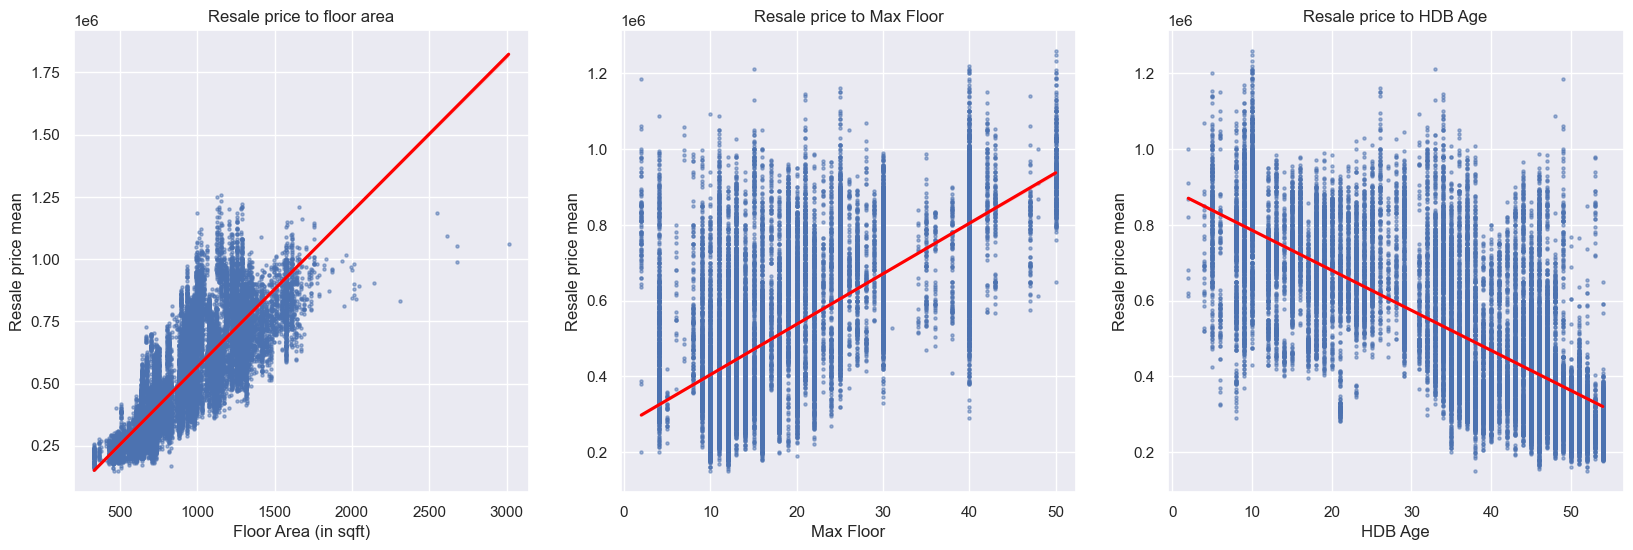

<Figure size 1000x1500 with 0 Axes>

In [63]:
fig, ax = plt.subplots(1,3)
plt.figure(figsize=(10,15));

#create scatter plot between floor_area_sqft and resale_price
sns.regplot(x = 'floor_area_sqft', y = 'resale_price', data = cr_only,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[0]);
ax[0].set_xlabel('Floor Area (in sqft)')
ax[0].set_title("Resale price to floor area")
ax[0].set_ylabel('Resale price mean')

#create scatter plot between max_floor_lvl and resale_price
sns.regplot(x = 'max_floor_lvl', y = 'resale_price', data = cr_only,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[1]);
ax[1].set_xlabel('Max Floor')
ax[1].set_title("Resale price to Max Floor")
ax[1].set_ylabel('Resale price mean')

#create scatter plot between hdb_age and resale_price
sns.regplot(x = 'hdb_age', y = 'resale_price', data = cr_only,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[2]);
ax[2].set_xlabel('HDB Age')
ax[2].set_title("Resale price to HDB Age")
ax[2].set_ylabel('Resale price mean');



*Interpretation: The 3 graphs show that for **central region**, `floor_area_sqft`, `max_floor_lvl`, `hdb_age` have stronger correlation to `resale_price` compared to non-central regions*

**Analyse transaction count of resale HDBs, with schools in central region**

In [19]:
cr_sch = df_train.loc[(df_train['region']==1),['region','resale_price','pri_sch_name','sec_sch_name']]

In [20]:
cr_sch.groupby('region')[['pri_sch_name','sec_sch_name']].value_counts()

region  pri_sch_name  sec_sch_name
1       0             0               24404
        1             0                2038
        0             1                1446
        1             1                 585
Name: count, dtype: int64

In [21]:
# plt.bar(cr_sch['pri_sch_name'])

In [22]:
# resale_price_loc_plot = df_train.groupby('planning_area')['resale_price'].count().sort_values(ascending=False).plot(kind='bar', color = colors, figsize = (12,8));
# plt.ylabel('Transaction Count')
# plt.xlabel('Location');
# plt.title("Transcation Count to Location", fontsize = 15);

### Feature Filtration

This part of notebook is to explain reason of dropping the following features before model creation:

|Dropped Feature|Justification|
|---|---|
|tranc_yearmonth, tranc_year, tranc_month|Datetime, it is not suitable to be used for modelling|
|lease_commence_date, year_completed|Redundant columns, can be represented as `hdb_age`|
|block, street_name, address, postal_code|Redundant for modelling, this model is based on planning area| 
|full_flat_type|combination of `flat_type` and `flat_model`
|storey_range, upper, mid, lower|Represented by mid_storey|
|floor_area_sqm|Same as `floor_area_sqft`|
|price_per_sqft|price should not be used to predict resale_price|
|residential|all column values is 1, no correlation identified|
|commercial|Irrelevant to modelling|
|total_dwelling_units|total units in a HDB, the model will use more detailed breakdown of quantity of 1 room, 2 room, 3 room, etc|
|1room_rental, 2room_rental, 3room_rental, other_room_rental|Irrelevant to predict resale_price|
|hawker_nearest_dist, hawker_within_500m, hawker_within_1km|analysis will focus on quantity of hawker within 2km, this covers for hawker within 500m and 1km|
|all latitude, longitude|Can be represented with nearest distance|
|mrt_name, bus_stop_name|Irrelevant to be modelled in this project|
|all mall columns|based on domain knowledge, malls should not have impact HDB price|
|market_hawker, multistorey_carpark, precint_pavilion, bus_interchange, mrt_interchange, bus_stop_nearest_distance, vacancy|has very minimum correlation to `resale_price`|


### Model Creation

Based on the domain knowledge and correlation coefficient, below is the list of numerical features selected:

**Selected Features**

|Feature|Type|Remarks                             
|---|---|---|
|town|*integer*|Featured to: Mature estate = 1, non-mature estate = 0|
|floor_area_sqft|*float*|No changes from original dataset|
|hdb_age|*integer*|No changes from original dataset|
|max_floor_lvl|*integer*|No changes from original dataset|
|mid_storey|*integer*|No changes from original dataset|
|1room_sold|*integer*|No changes from original dataset|
|2room_sold|*integer*|No changes from original dataset|
|3room_sold|*integer*|No changes from original dataset|
|4room_sold|*integer*|No changes from original dataset|
|5room_sold|*integer*|No changes from original dataset|
|exec_sold|*integer*|No changes from original dataset|
|multigen_sold|*integer*|No changes from original dataset|
|studio_apartment_sold|*integer*|No changes from original dataset|
|cutoff_point|*integer*|No changes from original dataset|
|affiliation|*integer*|No changes from original dataset|
|sec_sch_name|*integer*|Featured to: Top secondary school = 1, other secondary school = 0|
|pri_sch_name|*integer*|Featured to: Top primary school = 1, other primary school = 0|
|mrt_nearest_distance|*float*|No changes from original dataset|
|pri_sch_nearest_distance|*float*|No changes from original dataset|
|sec_sch_nearest_dist|*float*|No changes from original dataset|
|hawker_within_2km|*float*|No changes from original dataset|
|region|*integer*|added feature to represent: Central Region = 1, Outside Central Region = 0|
|planning_area|*str*|No changes from original dataset|
|flat_type|*str*|No changes from original dataset|
|flat_model|*str*|No changes from original dataset|


In [23]:
#features list for modelling (numerical value)
features = ['town','floor_area_sqft','hdb_age','max_floor_lvl','mid_storey',
            '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold',
            'exec_sold','multigen_sold','studio_apartment_sold','cutoff_point',
            'affiliation','sec_sch_name','pri_sch_name','mrt_nearest_distance',
            'pri_sch_nearest_distance','sec_sch_nearest_dist','hawker_within_2km'
            ,'region']

**Dummify variables**

In [24]:
#dummify planning area
planning_area_dummy = pd.get_dummies(df_train['planning_area'], drop_first=True, dtype= int)

#dummify flat model
flat_model_dummy = pd.get_dummies(df_train['flat_type'], drop_first = True, dtype = int)

#dummify flat model
flat_type_dummy = pd.get_dummies(df_train['flat_model'], drop_first = True, dtype = int)

**Model Prep: Define X and Y variables for regression model**

In [25]:
#define datasets for modelling
x_df = pd.concat([df_train[features],planning_area_dummy,flat_model_dummy,flat_type_dummy], axis = 1)

#define X and Y
X = x_df
y = df_train['resale_price']

**Model Prep: Create train-and-test split model**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

**Model Prep: Scale X variable**

Because there are significant value differences between some features, for example `floor_area_sqft` and `hdb_age` 

In [27]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

**Create Model: Linear Regression**

In [28]:
#instantiate model
lr = LinearRegression()

In [29]:
#fit model
lr.fit(X_train_ss,y_train)
y_preds = lr.predict(X_train_ss)

In [30]:
# check cross_val_score generated 
print(f'Linear Regression cross_val_score on train : {cross_val_score(lr, X_train_ss, y_train, cv=5).mean()}')
print(f'Linear Regression cross_val_score on test: {cross_val_score(lr, X_test_ss, y_test, cv=5).mean()}')

Linear Regression cross_val_score on train : 0.8733309510700099
Linear Regression cross_val_score on test: -3.970576718016111e+23


*Cross value scores between train and test models have a significant difference, model is overfitted*

In [31]:
print(f"The model r_square value is: {metrics.r2_score(y_train,y_preds)}")
print(f"The model mean absolute percentage error is: {metrics.mean_absolute_percentage_error(y_train,y_preds)}")
print(f"The model mean squared error is: {metrics.mean_squared_error(y_train,y_preds)}")

The model r_square value is: 0.873557443807893
The model mean absolute percentage error is: 0.09409422286210677
The model mean squared error is: 2589582586.34975


        Column_Name  Coefficient_Value
0              town       68083.952950
1   floor_area_sqft       80840.198343
2           hdb_age      -40841.535928
3     max_floor_lvl       23644.552677
4        mid_storey       18627.792025
..              ...                ...
73       Simplified       -1045.750000
74         Standard       -1487.250000
75          Terrace       10013.000000
76          Type S1        3199.250000
77          Type S2        3983.000000

[78 rows x 2 columns]


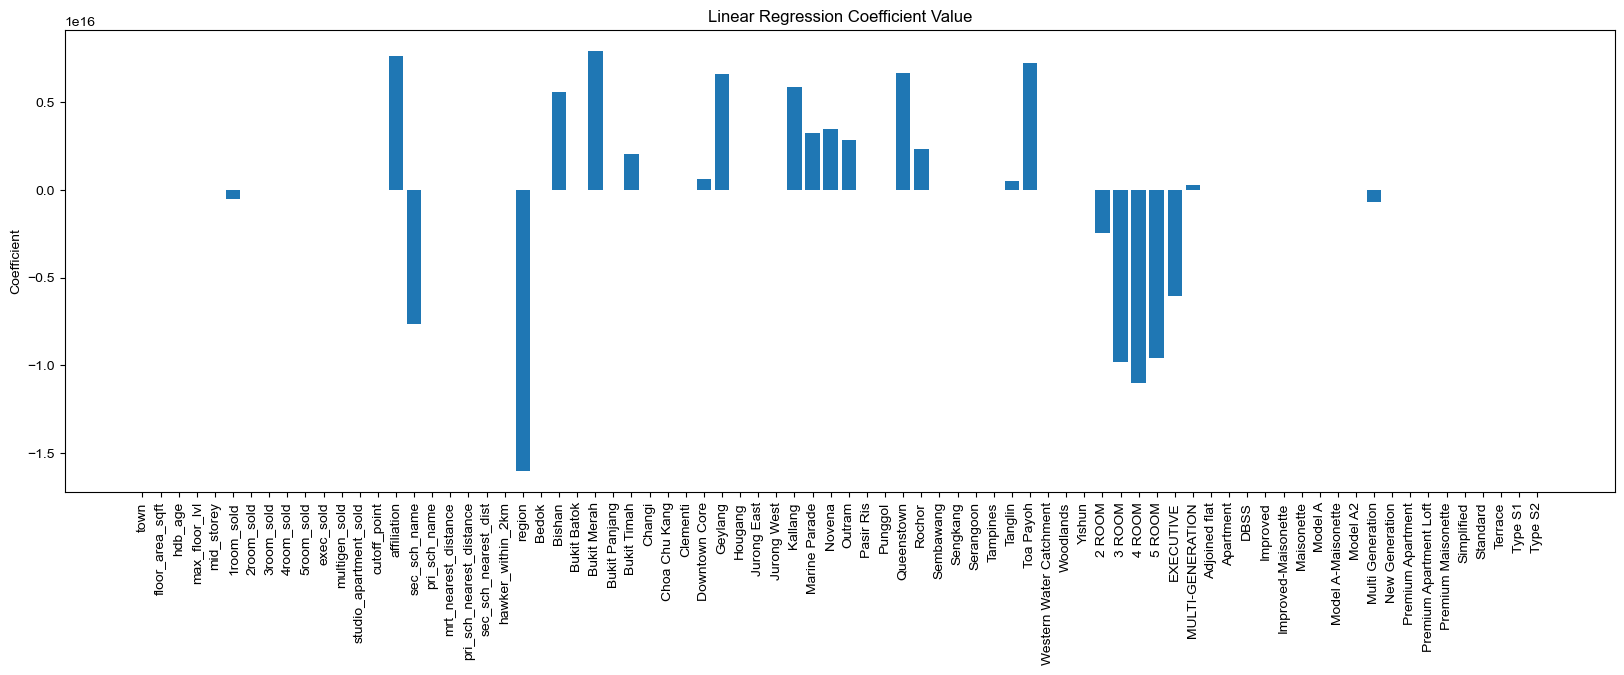

In [32]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lr.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (20,6);
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value']);
plt.xticks(rotation= 90);
plt.ylabel('Coefficient')
plt.title('Linear Regression Coefficient Value');
sns.set_theme()

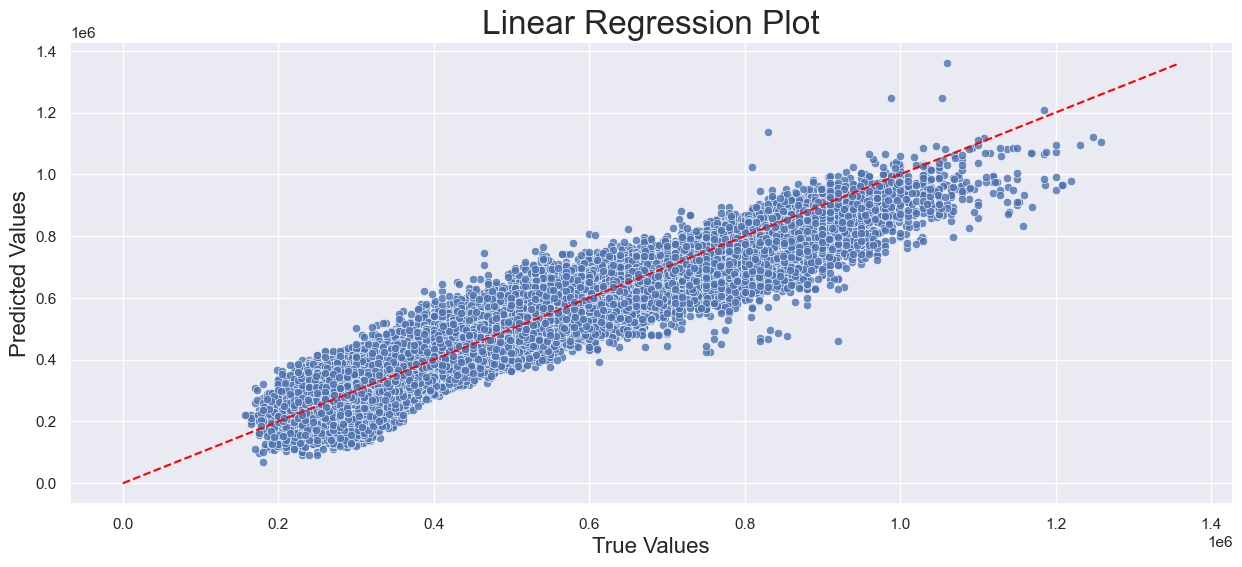

In [33]:
#plot linear regression model 
plt.figure(figsize=(15,6))
sns.set_theme()
sns.scatterplot(x = y_train, y = y_preds, alpha = 0.8)
plt.ylabel("Actual Resale Price")
plt.xlabel("Predicted Resale Price")
plt.title("Linear Regression Model");

#create perfect regression line reference
plt.plot([0, max(max(y_test),max(y_preds))],
         [0, max(max(y_test),max(y_preds))],
         linestyle = '--', color = 'red')

plt.title('Linear Regression Plot', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);


**Create Model: Ridge Regression**

In [34]:
#instantiate Ridge model
ridge = RidgeCV(np.linspace(1,5,100))

In [35]:
#fit to ridge model 
ridge.fit(X_train_ss,y_train)

RidgeCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.212121...
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989899,
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]))

In [36]:
print(f'Ridge Regression cross_val_score on train : {cross_val_score(ridge, X_train_ss, y_train, cv=5).mean()}')
print(f'Ridge Regression cross_val_score on test: {cross_val_score(ridge, X_test_ss, y_test, cv=5).mean()}')

Ridge Regression cross_val_score on train : 0.8733312670212877
Ridge Regression cross_val_score on test: 0.8720581866386908


*Cross validated scores are similar for both test and train models, this model fits well*

In [37]:
#create prediction variable 
ridge_preds = ridge.predict(X_train_ss)

In [38]:
print(f"The model r_square value is: {metrics.r2_score(y_train,ridge_preds)}")
print(f"The model mean absolute percentage error is: {metrics.mean_absolute_percentage_error(y_train,ridge_preds)}")
print(f"The model mean squared error is: {metrics.mean_squared_error(y_train,ridge_preds)}")

The model r_square value is: 0.8735628553184296
The model mean absolute percentage error is: 0.09404605631221673
The model mean squared error is: 2589471756.943311


        Column_Name  Coefficient_Value
0              town       66413.023122
1   floor_area_sqft       80420.922635
2           hdb_age      -40825.223629
3     max_floor_lvl       23629.488683
4        mid_storey       18623.958004
..              ...                ...
73       Simplified        -608.817840
74         Standard       -1123.447234
75          Terrace       10065.578864
76          Type S1        3281.985151
77          Type S2        4043.093913

[78 rows x 2 columns]


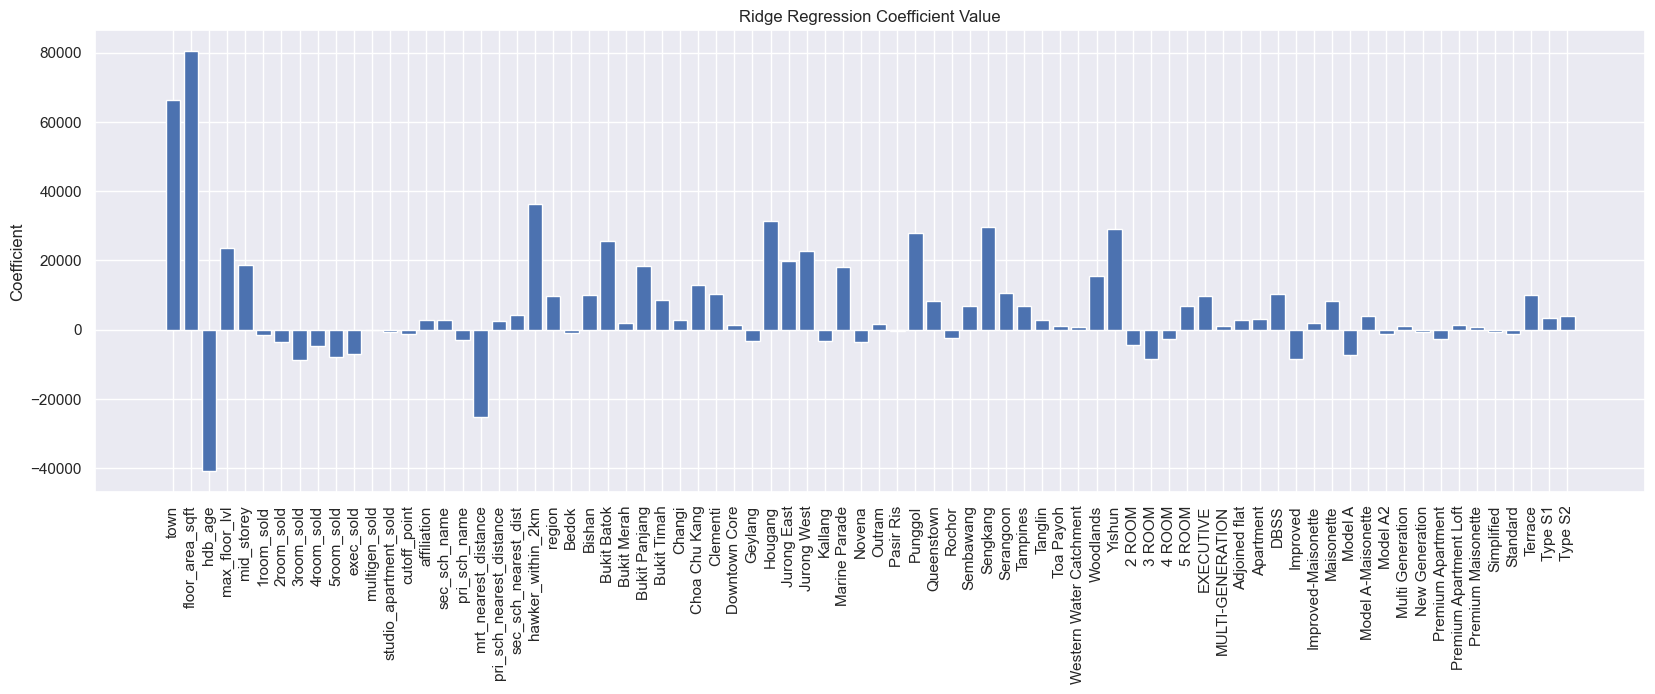

In [39]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridge.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (20,6);
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value']);
plt.xticks(rotation= 90);
plt.ylabel('Coefficient');
plt.title('Ridge Regression Coefficient Value');

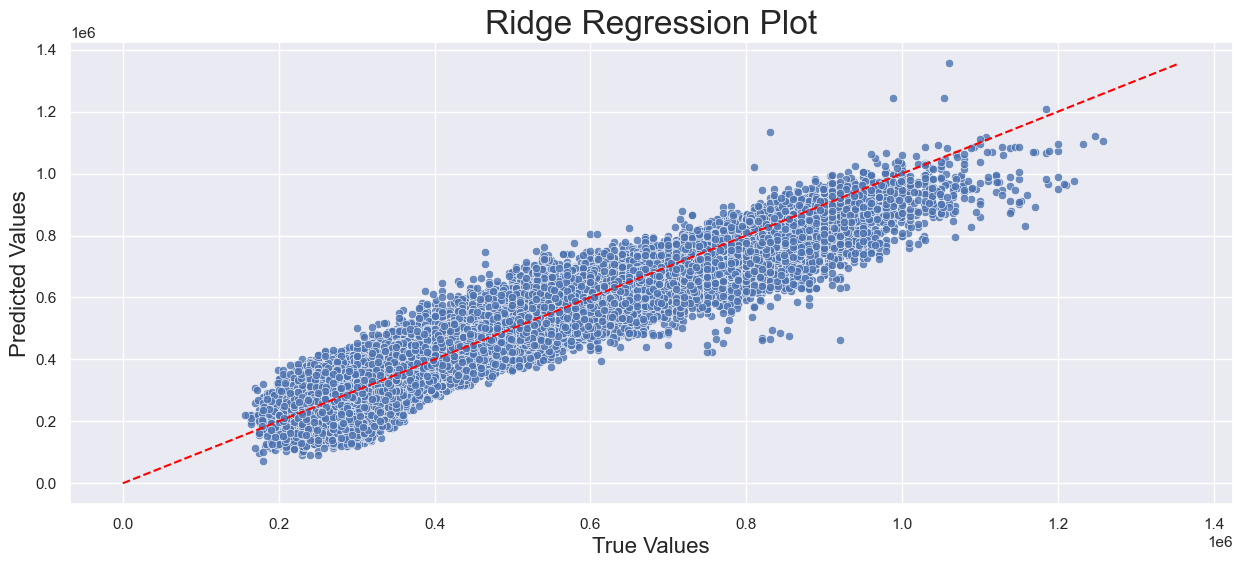

In [40]:
#plot ridge model 
plt.figure(figsize= (15,6))
sns.set_theme()
sns.scatterplot(x = y_train, y = ridge_preds, alpha = 0.8)
plt.ylabel("Actual Resale Price")
plt.xlabel("Predicted Resale Price")
plt.title("Ridge Regression Model");

#create perfect regression line reference
#create perfect regression line reference
plt.plot([0, max(max(y_test),max(ridge_preds))],
         [0, max(max(y_test),max(ridge_preds))],
         linestyle = '--', color = 'red')

plt.title('Ridge Regression Plot', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

**Create Model: Lasso Regression**

In [41]:
#instantiate model 
lasso = LassoCV(n_alphas=100)

In [42]:
print(f'Lasso Regression cross_val_score on train : {cross_val_score(lasso, X_train_ss, y_train, cv=5).mean()}')
print(f'Lasso Regression cross_val_score on test: {cross_val_score(lasso, X_test_ss, y_test, cv=5).mean()}')

Lasso Regression cross_val_score on train : 0.8729495021815901
Lasso Regression cross_val_score on test: 0.8716905233764679


*Cross validated scores are similar for both test and train models, this model fits well*

In [43]:
#fit lasso model
lasso.fit(X_train_ss, y_train)

LassoCV()

In [44]:
lasso_preds = lasso.predict(X_train_ss)

In [45]:
print(f"The model r_square value is: {metrics.r2_score(y_train,lasso_preds)}")
print(f"The model mean absolute percentage error is: {metrics.mean_absolute_percentage_error(y_train,lasso_preds)}")
print(f"The model mean squared error is: {metrics.mean_squared_error(y_train,lasso_preds)}")

The model r_square value is: 0.873179764592582
The model mean absolute percentage error is: 0.09415840196776898
The model mean squared error is: 2597317573.2770157


        Column_Name  Coefficient_Value
0              town       13096.775223
1   floor_area_sqft       81927.373940
2           hdb_age      -40811.180294
3     max_floor_lvl       23265.614853
4        mid_storey       18583.708713
..              ...                ...
73       Simplified         247.186099
74         Standard           0.000000
75          Terrace       10006.744996
76          Type S1        3325.727424
77          Type S2        4108.493763

[78 rows x 2 columns]


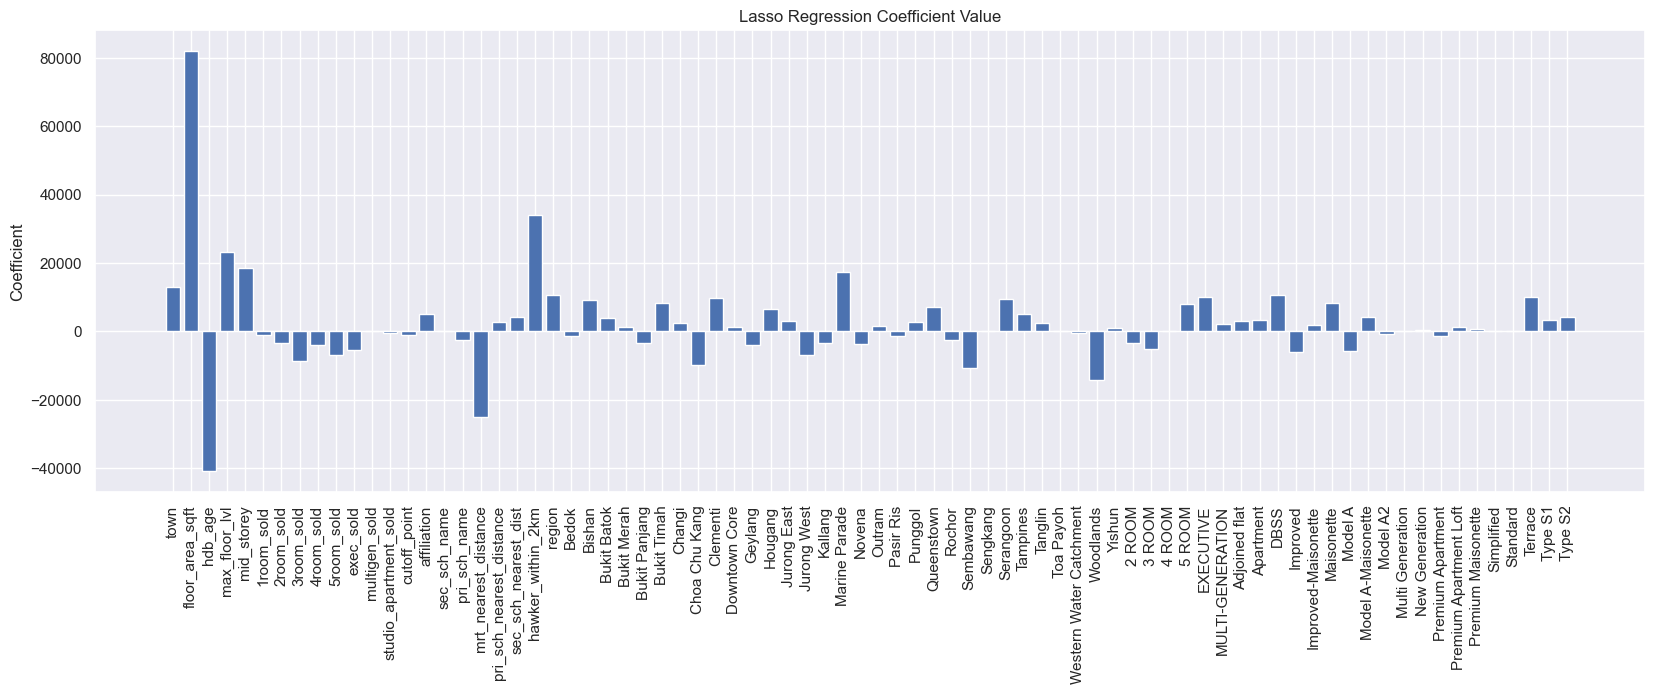

In [46]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lasso.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (20,6);
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value']);
plt.xticks(rotation= 90);
plt.ylabel('Coefficient');
plt.title('Lasso Regression Coefficient Value');

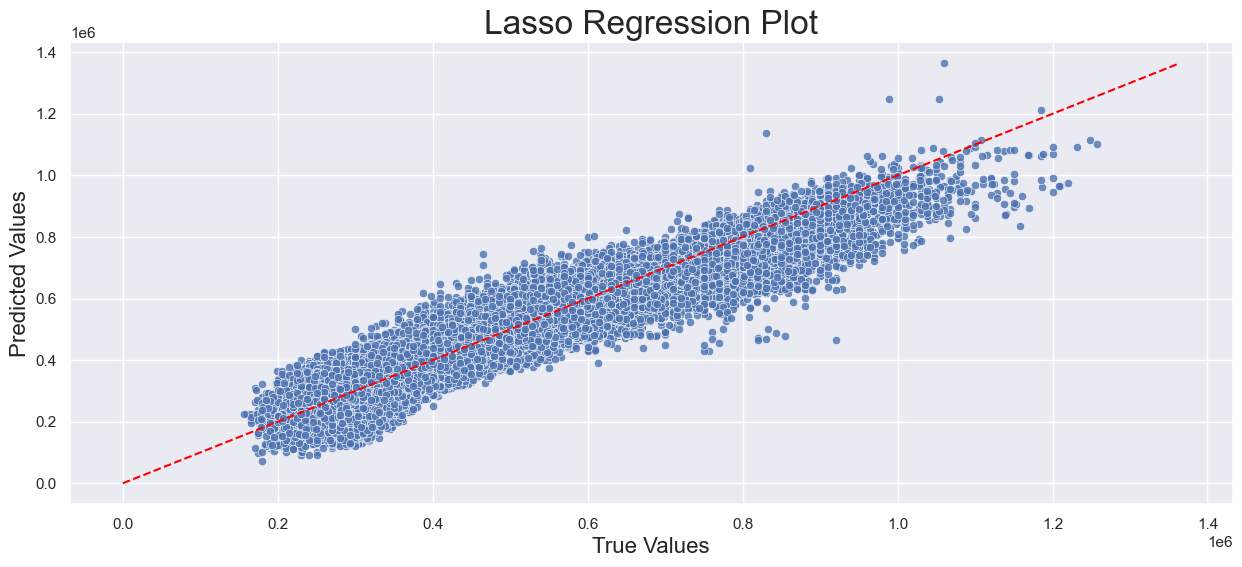

In [47]:
#plot lasso model 
plt.figure(figsize= (15,6))
sns.set_theme()
sns.scatterplot(x = y_train, y = lasso_preds, alpha = 0.8)
plt.ylabel("Actual Resale Price")
plt.xlabel("Predicted Resale Price")
plt.title("Lasso Regression Model");

#create perfect regression line reference
plt.plot([0, max(max(y_test),max(lasso_preds))],
         [0, max(max(y_test),max(lasso_preds))],
         linestyle = '--', color = 'red')

plt.title('Lasso Regression Plot', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);


|Model|cross_val_score(train)|cross_val_score(test)|
|---|---|---|
|Linear Regression|0.873|-7.352e+23|
|Ridge Regression|0.873|0.872|
|Lasso Regression|0.872|0.871|

*Comparing the three models, Ridge Regression has slightly higher cross_val_score and the model fits. Therefore, `Rigde` model is used to predict resale price on the test dataset.*
<br>
- *Coefficient of determination, $R^2$ score: $0.87$*
- *Mean absolute percentage error, MAPE score: $9.4\%$*

### Conclusion

**Key Insights:**
- Yes, resale prices of central region HDBs seem to be influenced primarily by its location.
- Secondarily, buyers may be drawn to the generally larger floor areas of central HDBs. However, this may also be found in non-central mature estates.
- Other factors such as proximity to top schools, malls, hawker centres and connectivity via public transport don’t seem to affect resale prices in the central region as much.

**Recommendations to Client:**
- Client may consider towns that border the central region
    - More budget-friendly (resale price generally below $500k)
    - Towns such as Serangoon and Ang Mo Kio also offer good public transport connectivity
        - Serangoon has a bus and an MRT interchange
        - AMK has a bus interchange, and is one MRT stop away from an MRT interchange (Bishan)

**Future Considerations for Modelling:**

|Model Limitation| Possible Solutions|
|---|---|
|Latest transactions in the dataset took place in 2021|Include transactions till 2023 to reflect the latest resale prices|
|Improved infrastructure such as new MRT lines and URA urban planning within certain towns may affect resale prices|Include “developing_towns” as an additional feature in dataset|
|Transaction volume alone may not be a sufficient indicator of supply & demand|Include “time_taken_to_sell” as an additional feature in dataset|

### Prediction Test with PropertyGuru Listings

**Prediction 1: Non-Central Region**

Location: [Tampines](https://www.propertyguru.com.sg/listing/hdb-for-sale-317-tampines-street-33-24973777)

In [48]:
df_test['flat_model']

0               Simplified
1        Premium Apartment
2           New Generation
3           New Generation
4                  Model A
               ...        
16732       New Generation
16733    Premium Apartment
16734             Improved
16735           Simplified
16736              Model A
Name: flat_model, Length: 16737, dtype: object

In [49]:
property_dict = {'town' : 1 ,
                'floor_area_sqft': 1152,
                'hdb_age': 29,
                'max_floor_lvl' : 10,
                'mid_storey': 2,
                '1room_sold': 0,
                '2room_sold': 0,
                '3room_sold': 0 ,
                '4room_sold': 45,
                '5room_sold': 45,
                'exec_sold': 0,
                'multigen_sold' : 0 ,
                'studio_apartment_sold' : 0,
                'cutoff_point': 237,
                'affiliation': 0,
                'sec_sch_name': 0,
                'pri_sch_name': 0,
                'mrt_nearest_distance': 410,
                'pri_sch_nearest_distance': 770,
                'sec_sch_nearest_dist': 770,
                'hawker_within_2km': 2,
                'region': 0,
                'planning_area' : 'Tampines',
                'flat_type': '4 ROOM',
                'flat_model': 'New Generation'}

In [50]:
df_property = pd.DataFrame([property_dict])

In [51]:
df_property = pd.get_dummies(df_property, prefix='', prefix_sep='', dtype = int)

In [52]:
missing = []
for name in X.columns:
    if name not in df_property.columns:
        missing.append(name)

df_property[missing] = 0

df_property = df_property[X.columns]

In [53]:
#scale application
X_property = df_property
X_property_ss = ss.transform(X_property)

In [54]:
prop_pred = ridge.predict(X_property_ss)

In [55]:
prop_pred

array([485620.7564163])

**Prediction 2: Central Region**

Location: [Bishan](https://www.propertyguru.com.sg/listing/hdb-for-sale-229-bishan-street-23-24964263)

In [56]:
property_dict2 = {'town' : 1 ,
                'floor_area_sqft': 1097,
                'hdb_age': 32,
                'max_floor_lvl' : 18,
                'mid_storey': 9,
                '1room_sold': 0,
                '2room_sold': 0,
                '3room_sold': 0 ,
                '4room_sold': 108,
                '5room_sold': 10,
                'exec_sold': 0,
                'multigen_sold' : 0 ,
                'studio_apartment_sold' : 0,
                'cutoff_point': 253,
                'affiliation': 1,
                'sec_sch_name': 1,
                'pri_sch_name': 1,
                'mrt_nearest_distance': 810,
                'pri_sch_nearest_distance': 560,
                'sec_sch_nearest_dist': 560,
                'hawker_within_2km': 8,
                'region': 1,
                'planning_area' : 'Bishan',
                'flat_type': '4 ROOM',
                'flat_model': 'Model A'}

In [57]:
df_property2 = pd.DataFrame([property_dict2])

In [58]:
df_property2 = pd.get_dummies(df_property2, prefix='', prefix_sep='', dtype = int)

In [59]:
missing = []
for name in X.columns:
    if name not in df_property2.columns:
        missing.append(name)

df_property2[missing] = 0

df_property2 = df_property2[X.columns]

In [60]:
X_property2 = df_property2
X_property2_ss = ss.transform(X_property2)

In [61]:
prop_pred2 = ridge.predict(X_property2_ss)

In [62]:
prop_pred2

array([613785.48616184])